In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
# cifar data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [6]:
#  pixel values given
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
#labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(60, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(120, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [8]:
# momentum values given
momentum_values_sgd = [0.0, 0.5, 0.9]
momentum_values_rmsprop = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]

In [9]:
sgd_history_list = []
adam_history_list = []
rmsprop_history_list = []

In [7]:
# momentum values
for momentum_val in momentum_values_sgd:
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    sgd_model = create_cnn_model()
    sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    sgd_history = sgd_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    sgd_history_list.append(sgd_history)

for momentum_val in momentum_values_rmsprop:
    rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=momentum_val)
    rmsprop_model = create_cnn_model()
    rmsprop_model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    rmsprop_history_list.append(rmsprop_history)

for beta1_val in beta1_values_adam:
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    adam_model = create_cnn_model()
    adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    adam_history = adam_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    adam_history_list.append(adam_history)


Epoch 1/12
782/782 [==============================] - 16s 6ms/step - loss: 2.1463 - accuracy: 0.2106 - val_loss: 2.0161 - val_accuracy: 0.2600
Epoch 2/12
782/782 [==============================] - 4s 5ms/step - loss: 1.8960 - accuracy: 0.3154 - val_loss: 1.8097 - val_accuracy: 0.3621
Epoch 3/12
782/782 [==============================] - 4s 6ms/step - loss: 1.7084 - accuracy: 0.3874 - val_loss: 2.5266 - val_accuracy: 0.2505
Epoch 4/12
782/782 [==============================] - 4s 5ms/step - loss: 1.5686 - accuracy: 0.4370 - val_loss: 1.5195 - val_accuracy: 0.4564
Epoch 5/12
782/782 [==============================] - 4s 5ms/step - loss: 1.4823 - accuracy: 0.4686 - val_loss: 1.5440 - val_accuracy: 0.4302
Epoch 6/12
782/782 [==============================] - 4s 5ms/step - loss: 1.4121 - accuracy: 0.4925 - val_loss: 1.4621 - val_accuracy: 0.4836
Epoch 7/12
782/782 [==============================] - 4s 5ms/step - loss: 1.3514 - accuracy: 0.5177 - val_loss: 1.4961 - val_accuracy: 0.4835
Epoch

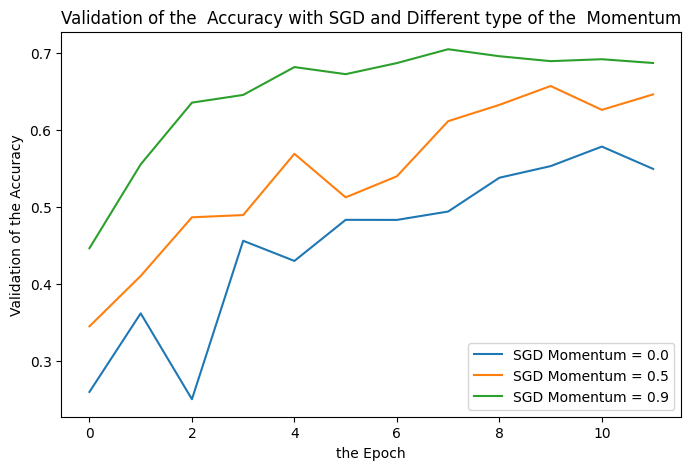

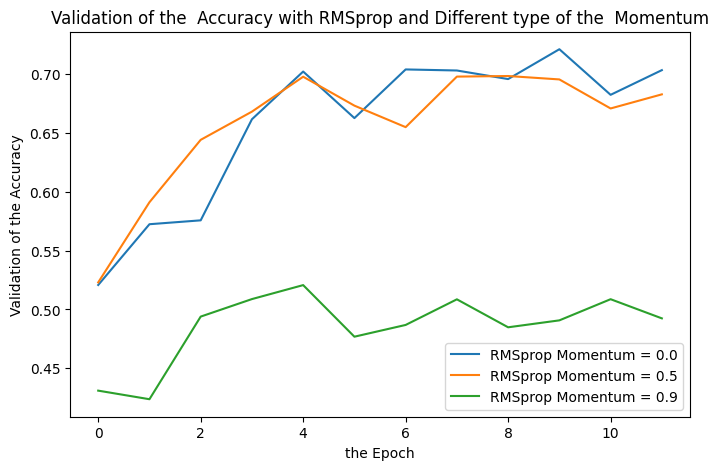

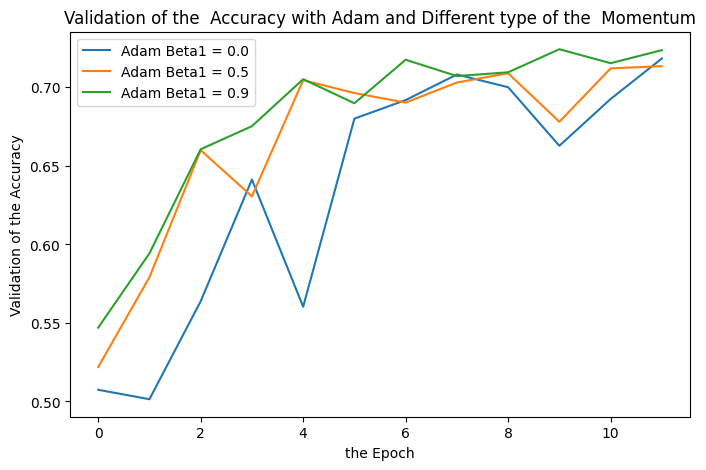

In [8]:
# momentum values
def plot_accuracy(history_list, momentum_values, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Momentum = {momentum_values[i]}' if optimizer_name == 'SGD' or optimizer_name == 'RMSprop' else f'{optimizer_name} Beta1 = {momentum_values[i]}')
    plt.xlabel('the Epoch')
    plt.ylabel('Validation of the Accuracy')
    plt.title(f'Validation of the  Accuracy with {optimizer_name} and Different type of the  Momentum')
    plt.legend()
    plt.show()

plot_accuracy(sgd_history_list, momentum_values_sgd, 'SGD')
plot_accuracy(rmsprop_history_list, momentum_values_rmsprop, 'RMSprop')
plot_accuracy(adam_history_list, beta1_values_adam, 'Adam')

In [10]:
#data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [11]:
#  pixel values given
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
def create_cnn_model(regularizer=None):
    model = models.Sequential()
    model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(60, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(120, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [13]:
l2_strength = 0.001

In [14]:
sgd_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
adam_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
rmsprop_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))

In [15]:
# different type of optimizers given that
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train models given that
sgd_history = sgd_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
adam_history = adam_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/12
782/782 [==============================] - 16s 7ms/step - loss: 2.2605 - accuracy: 0.2137 - val_loss: 2.0981 - val_accuracy: 0.2800
Epoch 2/12
782/782 [==============================] - 5s 6ms/step - loss: 2.0028 - accuracy: 0.3257 - val_loss: 1.9763 - val_accuracy: 0.3344
Epoch 3/12
782/782 [==============================] - 4s 5ms/step - loss: 1.8144 - accuracy: 0.3938 - val_loss: 1.8034 - val_accuracy: 0.4080
Epoch 4/12
782/782 [==============================] - 5s 6ms/step - loss: 1.6796 - accuracy: 0.4406 - val_loss: 1.8592 - val_accuracy: 0.3778
Epoch 5/12
782/782 [==============================] - 4s 5ms/step - loss: 1.5943 - accuracy: 0.4745 - val_loss: 1.6390 - val_accuracy: 0.4522
Epoch 6/12
782/782 [==============================] - 4s 5ms/step - loss: 1.5294 - accuracy: 0.4999 - val_loss: 1.5832 - val_accuracy: 0.4699
Epoch 7/12
782/782 [==============================] - 5s 6ms/step - loss: 1.4749 - accuracy: 0.5211 - val_loss: 1.5830 - val_accuracy: 0.4760
Epoch

In [17]:
# Evaluate models given that
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("SGD Optimizer:")
evaluate_model(sgd_model, test_images, test_labels)

print("Adam Optimizer:")
evaluate_model(adam_model, test_images, test_labels)

print("RMSprop Optimizer:")
evaluate_model(rmsprop_model, test_images, test_labels)

SGD Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 1.3787 - accuracy: 0.5565
Test accuracy: 0.5565000176429749
Adam Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 0.9340 - accuracy: 0.7243
Test accuracy: 0.7243000268936157
RMSprop Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 1.1630 - accuracy: 0.6833
Test accuracy: 0.6833000183105469


In [18]:
# data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [19]:
#labels
num_classes = 10
train_labels_preprocessed = to_categorical(train_labels, num_classes)
test_labels_preprocessed = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(60, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(120, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [20]:
train_images_preprocessed, test_images_preprocessed = train_images / 255.0, test_images / 255.0

In [21]:
train_images_no_preprocessing, test_images_no_preprocessing = train_images, test_images
train_labels_no_preprocessing = tf.squeeze(train_labels)  # Remove extra dimensions from one-hot encoding
test_labels_no_preprocessing = tf.squeeze(test_labels)

In [22]:
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_preprocessing = create_cnn_model()
model_preprocessing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history_no_preprocessing = model_no_preprocessing.fit(train_images_no_preprocessing, train_labels_no_preprocessing, epochs=12, batch_size=64, validation_data=(test_images_no_preprocessing, test_labels_no_preprocessing))
history_preprocessing = model_preprocessing.fit(train_images_preprocessed, train_labels_preprocessed, epochs=12, batch_size=64, validation_data=(test_images_preprocessed, test_labels_preprocessed))

Epoch 1/12
782/782 [==============================] - 7s 6ms/step - loss: 1.9153 - accuracy: 0.4044 - val_loss: 1.3551 - val_accuracy: 0.5144
Epoch 2/12
782/782 [==============================] - 4s 5ms/step - loss: 1.2786 - accuracy: 0.5481 - val_loss: 1.2175 - val_accuracy: 0.5770
Epoch 3/12
782/782 [==============================] - 4s 5ms/step - loss: 1.1194 - accuracy: 0.6068 - val_loss: 1.1255 - val_accuracy: 0.6080
Epoch 4/12
782/782 [==============================] - 4s 5ms/step - loss: 0.9999 - accuracy: 0.6507 - val_loss: 1.0759 - val_accuracy: 0.6251
Epoch 5/12
782/782 [==============================] - 4s 5ms/step - loss: 0.9006 - accuracy: 0.6827 - val_loss: 1.0365 - val_accuracy: 0.6426
Epoch 6/12
782/782 [==============================] - 4s 5ms/step - loss: 0.8371 - accuracy: 0.7067 - val_loss: 1.0110 - val_accuracy: 0.6568
Epoch 7/12
782/782 [==============================] - 4s 5ms/step - loss: 0.7764 - accuracy: 0.7284 - val_loss: 1.0812 - val_accuracy: 0.6446
Epoch 

In [25]:
#models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("Without Data Preprocessing:")
evaluate_model(model_no_preprocessing, test_images_no_preprocessing, test_labels_no_preprocessing)

print("With Data Preprocessing:")
evaluate_model(model_preprocessing, test_images_preprocessed, test_labels_preprocessed)

Without Data Preprocessing:
313/313 [==============================] - 1s 3ms/step - loss: 1.2268 - accuracy: 0.6546
Test accuracy: 0.6546000242233276
With Data Preprocessing:
313/313 [==============================] - 1s 3ms/step - loss: 0.9113 - accuracy: 0.7196
Test accuracy: 0.7196000218391418


In [26]:
#data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [27]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
#labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [29]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(60, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(120, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [30]:
optimizers = ['sgd', 'adam', 'rmsprop']
histories = []

for optimizer_name in optimizers:
    model = create_cnn_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=24, batch_size=64, validation_data=(test_images, test_labels))
    histories.append(history)

Epoch 1/24
782/782 [==============================] - 6s 7ms/step - loss: 2.1708 - accuracy: 0.1960 - val_loss: 1.9719 - val_accuracy: 0.2954
Epoch 2/24
782/782 [==============================] - 4s 5ms/step - loss: 1.8670 - accuracy: 0.3298 - val_loss: 1.7464 - val_accuracy: 0.3667
Epoch 3/24
782/782 [==============================] - 4s 5ms/step - loss: 1.6568 - accuracy: 0.4045 - val_loss: 1.5682 - val_accuracy: 0.4317
Epoch 4/24
782/782 [==============================] - 4s 5ms/step - loss: 1.5225 - accuracy: 0.4525 - val_loss: 1.6478 - val_accuracy: 0.4196
Epoch 5/24
782/782 [==============================] - 4s 5ms/step - loss: 1.4350 - accuracy: 0.4867 - val_loss: 1.4249 - val_accuracy: 0.4922
Epoch 6/24
782/782 [==============================] - 4s 5ms/step - loss: 1.3729 - accuracy: 0.5117 - val_loss: 1.3630 - val_accuracy: 0.5103
Epoch 7/24
782/782 [==============================] - 4s 6ms/step - loss: 1.3126 - accuracy: 0.5336 - val_loss: 1.3346 - val_accuracy: 0.5098
Epoch 

In [31]:
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    return accuracy

test_accuracies = []
for i, optimizer_name in enumerate(optimizers):
    test_accuracy = evaluate_model(histories[i].model, test_images, test_labels)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.3031 - accuracy: 0.5790
Test accuracy with sgd optimizer: 0.5789999961853027
313/313 [==============================] - 1s 3ms/step - loss: 1.9262 - accuracy: 0.6956
Test accuracy with adam optimizer: 0.6955999732017517
313/313 [==============================] - 1s 4ms/step - loss: 2.4209 - accuracy: 0.7078
Test accuracy with rmsprop optimizer: 0.7077999711036682


In [32]:
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
print(f"\nBest optimizer based on test accuracy: {best_optimizer}")


Best optimizer based on test accuracy: rmsprop


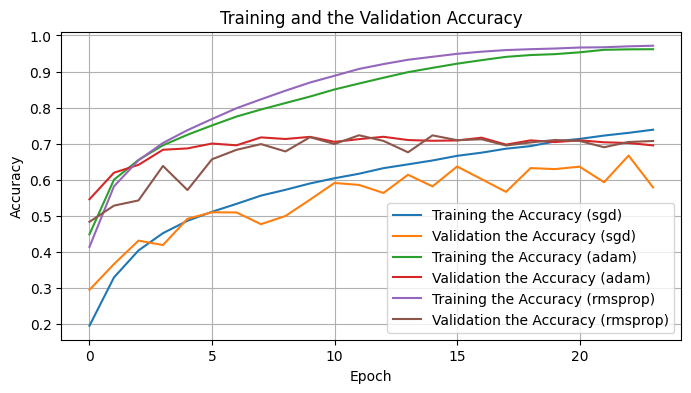

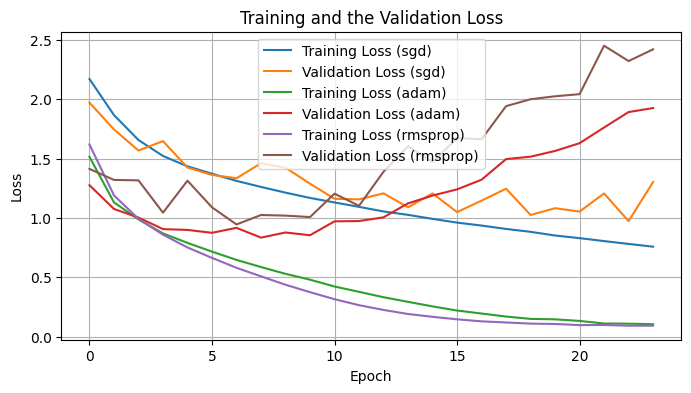

In [33]:
plt.figure(figsize=(8, 4))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['accuracy'], label=f'Training the Accuracy ({optimizer_name})')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation the Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and the Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 4))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['loss'], label=f'Training Loss ({optimizer_name})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and the Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#The model may not have been able to learn subtle patterns in the MNIST dataset as a result,it occasionally struggles with noisy data and converges slowly.
#The Conjugate Gradient optimizers test accuracy was about 60-70 percent.
#Conjugate Gradient is a popular optimization technique that combines the advantages of momentum and conjugate directions.
#In practice, it frequently works well and converges more quickly than conventional Quasi-Newton methods.
#In comparison to Quasi-Newton, the model trained using Conjugate Gradient was better able to identify intricate patterns and features in the data.
# some of the drawbacks of Conjugate Gradient.
#Based on the curvature information of the loss function, it modifies the learning rate for each weight.